# ```aggregate```: Simple Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")
# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg

In [2]:
uw = agg.Underwriter()

In [3]:
uw.list()

,Severity,Aggregate,Portfolio
0,cata,auto,Mixed
1,catb,cal,Single
2,catc,casxol,Sublines
3,catd,cata,Three Line Example
4,cate,catb,bodoff1
5,directors_a,catc,bodoff2
6,directors_b,catd,bodoff3
7,directors_c,cate,bodoff4
8,fixed,cmp,interesting_cat
9,liaba,comm_auto,mass_test


In [4]:
uw.describe(pretty_print=True);

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
cata,aggregate,pareto,0,2.1,0,3.7,0,0,tropical storms and up US wind events
catb,aggregate,pareto,0,1.7,0,1.7,0,0,category 1 and up US wind events
catc,aggregate,pareto,0,1.4,0,1.3,0,0,category 3 and up US wind events
catd,aggregate,pareto,0,1.1,0,0.4,0,0,category 4 and up US wind events
cate,aggregate,pareto,0,0.9,0,0.1,0,0,category 5 and up US wind events
scs,aggregate,lognorm,1e+08,0,0,25,0,0,industry severe convective storm losses
casxol,aggregate,lognorm,5e+07,0,0,0.5,0,0,"Bermuda like casualty excess of loss book, 0.5 claims"
noncata,aggregate,lognorm,50000,0,0,1e+06,0.1,0,"industry total non cat losses, all lines"
cal,aggregate,lognorm,40000,0,0,462316,0.24,0,"US statutory industry commercial auto liability, SNL 2017"


,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
bodoff1,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 1
bodoff2,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 2
bodoff3,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 3
bodoff4,portfolio,,0,0,0,0,0,0,Bodoff Thought Experiment No. 4
Three Line Example,portfolio,,0,0,0,0,0,0,"User example, single line, mixed sev, and sublines"
Single,portfolio,,0,0,0,0,0,0,single line example
Mixed,portfolio,,0,0,0,0,0,0,mixed severity example with different CVs
Sublines,portfolio,,0,0,0,0,0,0,sublines defining a limit profile
small_medium_large,portfolio,,0,0,0,0,0,0,"three line example with small, medium and large claims"


,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
fixed,severity,dhistogram,0,0,0,0,0,0,fixed loss of 1
directors_a,severity,lognorm,1e+07,1.25,0,0,0,0,"direcotrs and officers liability class a, sigma=1.25"
directors_b,severity,lognorm,1e+07,1.75,0,0,0,0,"direcotrs and officers liability class b, sigma=1.75"
directors_c,severity,lognorm,1e+07,2,0,0,0,0,"direcotrs and officers liability class c, sigma=2.00"
liaba,severity,lognorm,50,0,0,0,0,0,"prems ops A, lognormal cv=1.0"
liabb,severity,lognorm,24,0,0,0,0,0,"prems ops B, lognormal cv=1.5"
liabc,severity,lognorm,50,0,0,0,0,0,"prems ops C, lognormal cv=2.0"


In [5]:
uw.describe('severity')

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
fixed,severity,dhistogram,0,0.00,0,0,0,0,fixed loss of 1
directors_a,severity,lognorm,10000000,1.25,0,0,0,0,"direcotrs and officers liability class a, sigma=1.25"
directors_b,severity,lognorm,10000000,1.75,0,0,0,0,"direcotrs and officers liability class b, sigma=1.75"
directors_c,severity,lognorm,10000000,2.00,0,0,0,0,"direcotrs and officers liability class c, sigma=2.00"
cata,severity,pareto,0,2.10,0,0,0,0,"small cat, pareto 2.1"
catb,severity,pareto,0,1.70,0,0,0,0,"moderate cat, pareto 1.7"
catc,severity,pareto,0,1.40,0,0,0,0,"severe cat, pareto 1.4"
catd,severity,pareto,0,1.10,0,0,0,0,"very severe cat, pareto 1.1"
cate,severity,pareto,0,0.90,0,0,0,0,"extreme cat, pareto 0.9"


In [4]:
uw['liabc']

('severity',
 {'note': 'prems ops C, lognormal cv=2.0',
  'sev_cv': 1.0,
  'sev_mean': 50,
  'sev_name': 'lognorm'})

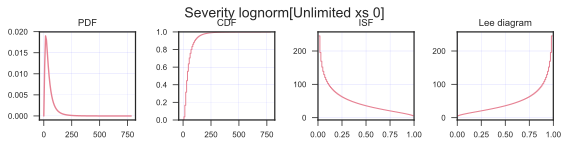

In [6]:
uw.liabc.plot()

In [7]:
uw['ppal']

('aggregate',
 {'exp_en': 5676073.301971859,
  'freq_a': 0.089,
  'note': 'US statutory industry private passenger auto liability, SNL 2017',
  'sev_cv': 0.5,
  'sev_mean': 30000.0,
  'sev_name': 'lognorm'})

In [11]:
ag = uw.ppal
ag.recommend_bucket(14)

# .plot()

13494343.126255266

In [15]:
ag.easy_update(14)
ag.report('all')

ppal                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        2.210913e+11  0.089001  1.702822e+11  2.922571e+22  5.055460e+33   
freq                NaN  0.089001  5.676073e+06  3.247301e+13  1.872392e+20   
sev                 NaN  0.500000  3.000000e+04  1.125000e+09  5.273438e+13   

                                      
measure   limit          mean   skew  
component                             
agg         inf  1.702822e+11  0.178  
freq        NaN  5.676073e+06  0.178  
sev         NaN  3.000000e+04  1.625

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,ppal,inf,0,1.70282e+11,5.67607e+06,30000,1.70282e+11,0.0890012,0.178,NaN,NaN,NaN,NaN
mixed,ppal,inf,0,1.70282e+11,5.67607e+06,30000,1.70282e+11,0.0890012,0.178,NaN,NaN,1.702262e+11,0.088461


,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,ppal,inf,0,0.5,1.70282e+11,0,0,5.67607e+06,3.2473e+13,1.87239e+20,5.67607e+06,0.089001,0.178,30000,1.125e+09,5.27344e+13,30000,0.5,1.625,1.70282e+11,2.92257e+22,5.05546e+33,1.70282e+11,0.0890012,0.178,0.089,0.089,1


In [17]:
pf = uw.bodoff1

In [19]:
pf.update(8, 1)

/s/telos/python/aggregate_project\aggregate\port.py:1071: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python/aggregate_project\aggregate\port.py:1075: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_ημ_' + col])) / \
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


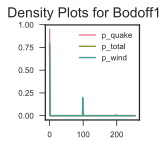

In [22]:
pf.plot('density')

In [23]:
with uw.write('a: 0.01 * uw.liaba', 'test', update=True, log2=13) as c:
    c.plot()
    print(c.moms())

AssertionError: 

In [9]:
uw.describe('blocks')

,Type,Severity,ESev,Sev_a,Sev_b,EN,Freq_a,ELoss,Notes
Name,,,,,,,,,
scs,blocks,lognorm,100000000.0,0.00,0,2.500000e+01,0.000,0,industry severe convective storm losses
cata,blocks,pareto,0.0,2.10,0,3.700000e+00,0.000,0,tropical storms and up US wind events
catb,blocks,pareto,0.0,1.70,0,1.700000e+00,0.000,0,category 1 and up US wind events
catc,blocks,pareto,0.0,1.40,0,1.300000e+00,0.000,0,category 3 and up US wind events
catd,blocks,pareto,0.0,1.10,0,4.000000e-01,0.000,0,category 4 and up US wind events
cate,blocks,pareto,0.0,0.90,0,1.000000e-01,0.000,0,category 5 and up US wind events
casxol,blocks,lognorm,50000000.0,0.00,0,5.000000e-01,0.000,0,"Bermuda like casualty excess of loss book, 0.5 claims"
noncata,blocks,lognorm,50000.0,0.00,0,1.000000e+06,0.100,0,"industry total non cat losses, all lines"
cal,blocks,lognorm,40000.0,0.00,0,4.623164e+05,0.240,0,"US statutory industry commercial auto liability, SNL 2017"


In [10]:
biz = uw.homeowners 
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')

Type: <class 'aggregate.underwriter.Block'>
str:  {'name': 'homeowners', 'exp_el': 0.0, 'exp_premium': 0.0, 'exp_lr': 0.0, 'exp_en': 4337346.319489225, 'exp_attachment': 0.0, 'exp_limit': 2500, 'sev_name': 'lognorm', 'sev_a': 0.0, 'sev_b': 0.0, 'sev_mean': 15.0, 'sev_cv': 0.5, 'sev_loc': 0.0, 'sev_scale': 0.0, 'sev_xs': None, 'sev_ps': None, 'sev_wt': 1, 'freq_name': 'poisson', 'freq_a': 0.24, 'freq_b': 0.0, 'note': 'US statutory industry homeowners, SNL 2017'}
repr: {'name': 'homeowners', 'exp_el': 0.0, 'exp_premium': 0.0, 'exp_lr': 0.0, 'exp_en': 4337346.319489225, 'exp_attachment': 0.0, 'exp_limit': 2500, 'sev_name': 'lognorm', 'sev_a': 0.0, 'sev_b': 0.0, 'sev_mean': 15.0, 'sev_cv': 0.5, 'sev_loc': 0.0, 'sev_scale': 0.0, 'sev_xs': None, 'sev_ps': None, 'sev_wt': 1, 'freq_name': 'poisson', 'freq_a': 0.24, 'freq_b': 0.0, 'note': 'US statutory industry homeowners, SNL 2017'}


In [11]:
biz = uw.homeowners.write()
print(f'Type: {type(biz)}\nstr:  {biz}\nrepr: {repr(biz)}')
biz.report('quick')

Type: <class 'aggregate.distr.Aggregate'>
str:  Aggregate: homeowners
	EN=4337346.319489225, CV(N)=0.240
	1 severity, EX=15.0, CV(X)=0.500
	EA=65,060,194.8, CV=0.240
repr: <aggregate.distr.Aggregate object at 0x00000154FD90D320>


homeowners                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        1.248702e+08  0.240001  6.506019e+07  4.476641e+15  3.248034e+23   
freq                NaN  0.240000  4.337346e+06  1.989618e+13  9.623804e+19   
sev                 NaN  0.500000  1.500000e+01  2.812500e+02  6.591797e+03   

                                        
measure     limit          mean   skew  
component                               
agg        2500.0  6.506019e+07  0.480  
freq          NaN  4.337346e+06  0.480  
sev           NaN  1.500000e+01  1.625

In [12]:
biz.bs = 10000000
biz.log2 = 13

In [13]:
biz.recommend_bucket(verbose=True)

Recommended bucket size with 1024 buckets: 121,944
Recommended bucket size with 8192 buckets: 15,243
Recommended bucket size with 65536 buckets: 1,905
Bucket size set with 8192 buckets at 10,000,000


121943.52285414209

In [30]:
## R E S T A R T   F R O M   H E R E =========================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 10, .75)
sns.set_style("ticks")
# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


,limit,attachment,en,emp ex1,emp cv,sum p_i,wt,nans,max,wtmax,min
n,,,,,,,,,,,
Agg,0,0,4.33735e+06,6.49926e+07,0.238106,1,NaN,0,0.00321723,NaN,9.41809e-13


,limit,attachment,emp ex1,emp cv,freq_1,sev_1,sev_cv,abs sev err,rel sev err
Agg,0,0,6.49926e+07,0.238106,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,4.33735e+06,15,0.5,NaN,NaN
mixed,NaN,NaN,NaN,NaN,4.33735e+06,15,0.5,NaN,NaN
independent,NaN,NaN,NaN,NaN,4.33735e+06,6.50602e+07,0.240001,NaN,NaN


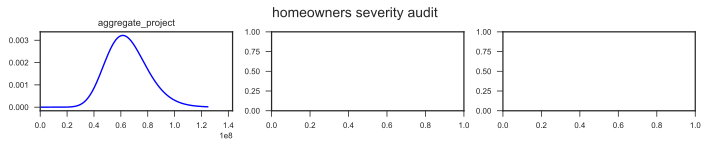

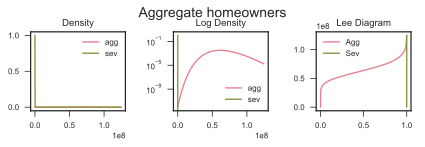

In [2]:
import aggregate as agg
uw = agg.Underwriter()
biz = uw.homeowners.write()
a, b = biz.easy_update(10, reporting_level=1, verbose=True)
display(a)
display(b)

In [3]:
biz.audit_df

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


In [4]:
print(biz)

Aggregate: homeowners
	EN=4337346.319489225, CV(N)=0.240
	1 severity, EX=15.0, CV(X)=0.500
	EA=65,060,194.8, CV=0.240


In [5]:
biz.report('all')

homeowners                                                      \
measure          P99.9e        cv           ex1           ex2           ex3   
component                                                                     
agg        1.248702e+08  0.240001  6.506019e+07  4.476641e+15  3.248034e+23   
freq                NaN  0.240000  4.337346e+06  1.989618e+13  9.623804e+19   
sev                 NaN  0.500000  1.500000e+01  2.812500e+02  6.591797e+03   

                                        
measure     limit          mean   skew  
component                               
agg        2500.0  6.506019e+07  0.480  
freq          NaN  4.337346e+06  0.480  
sev           NaN  1.500000e+01  1.625

,name,limit,attachment,el,freq_1,sev_1,agg_m,agg_cv,agg_skew,emp_sev_1,emp_sev_cv,emp_agg_1,emp_agg_cv
0,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,NaN,NaN
mixed,homeowners,2500,0,6.50602e+07,4.33735e+06,15,6.50602e+07,0.240001,0.48,NaN,NaN,6.499262e+07,0.238106


,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,homeowners,2500,0,0.5,6.50602e+07,0,0,4.33735e+06,1.98962e+13,9.6238e+19,4.33735e+06,0.24,0.48,15,281.25,6591.8,15,0.5,1.625,6.50602e+07,4.47664e+15,3.24803e+23,6.50602e+07,0.240001,0.48,0.24,0.24,1


# From write script using built in blocks

In [13]:
from importlib import reload
import aggregate as agg
import aggregate.underwriter as trash

In [20]:
reload(trash)
uw = trash.Underwriter()

In [21]:
uw.list().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Severity,cata,catb,catc,catd,cate,directors_a,directors_b,directors_c,fixed,liaba,liabb,liabc,,,,,,,,
Aggregate,auto,cal,casxol,cata,catb,catc,catd,cate,cmp,comm_auto,comm_prop,homeowners,inland_marine,my_earthquake,my_wind,noncata,pers_auto,ppal,scs,work_comp
Portfolio,Mixed,Single,Sublines,Three Line Example,bodoff1,bodoff2,bodoff3,bodoff4,interesting_cat,mass_test,small_medium_large,,,,,,,,,


In [27]:
pf, spec = uw.write('PA: 0.0085 * uw.pers_auto;CA: 0.02 * uw.comm_auto;WC: 0.005 * uw.work_comp', 'test', True, False, log2=16, bs=10e4, remove_fuzz=True)

In [28]:
pf.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
CA,3.40564e+09,3.40564e+09,-2.5191e-13,0.0890012,0.0890012,4.9889e-12,4.1507e+09
PA,1.4474e+09,1.4474e+09,-1.07914e-13,0.0890012,0.0890012,1.99019e-12,1.764e+09
WC,1.99826e+08,1.99826e+08,-8.16014e-14,0.190049,0.190049,-1.57963e-12,2.989e+08
total,5.05287e+09,5.05274e+09,-2.59528e-05,0.000384009,0.0657487,170.217,5.8603e+09


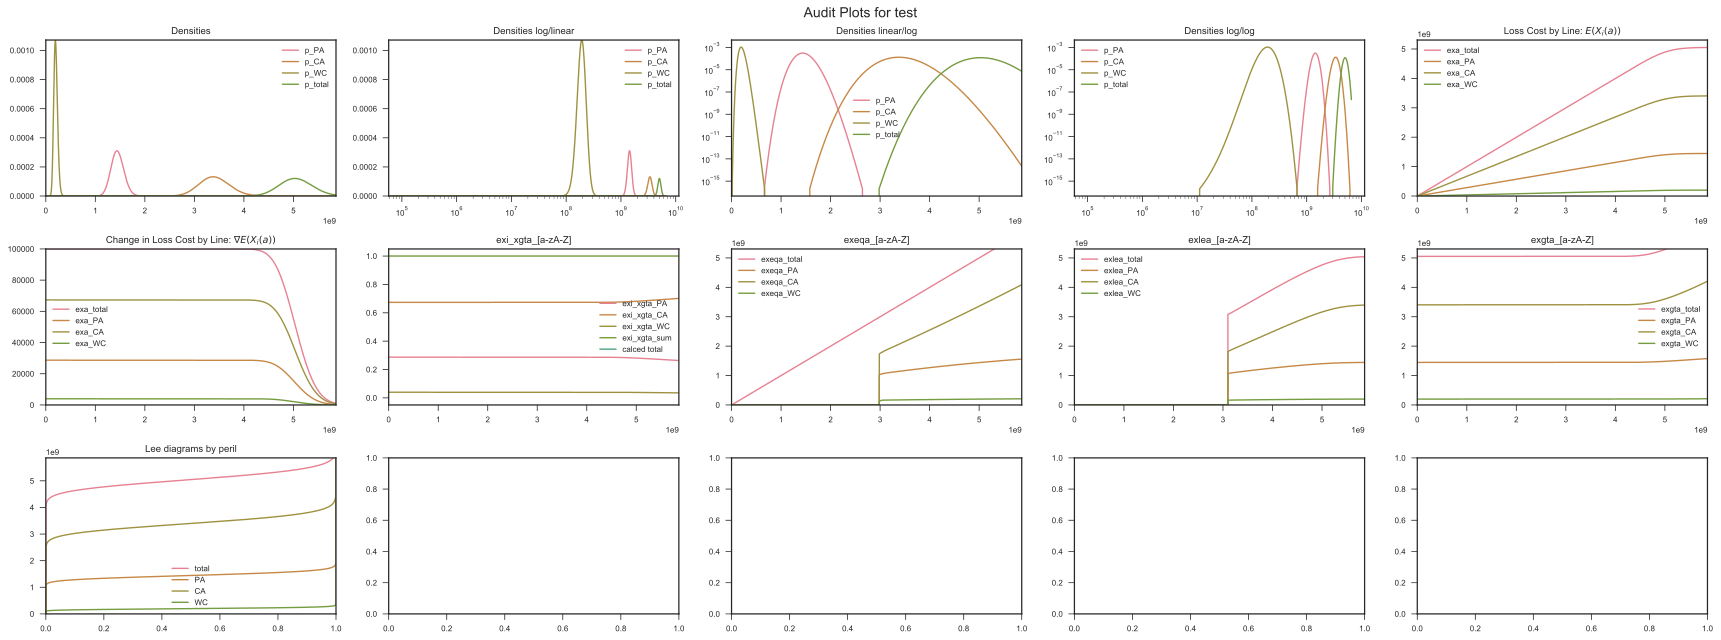

In [31]:
pf.plot('audit', aspect=1.6, height=3)

In [3]:
import aggregate.underwriter as trash

In [46]:
reload(trash)
uw = trash.Underwriter()

In [47]:
ans = uw.write("""
A: 50  claims   gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims    gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

In [ ]:
uw.last_spec

In [48]:
ans.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A,0.875125,0.437562,0.218781,0.109391,0.054695,0.027348,0.013674,0.003418,0.000855
A2,0.295299,0.147649,0.073825,0.036912,0.018456,0.009228,0.004614,0.001154,0.000288
A3,0.875125,0.437562,0.218781,0.109391,0.054695,0.027348,0.013674,0.003418,0.000855
A4,0.184202,0.092101,0.046051,0.023025,0.011513,0.005756,0.002878,0.000720,0.000180
B,8.108148,4.054074,2.027037,1.013518,0.506759,0.253380,0.126690,0.031672,0.007918
Cat,0.139040,0.069520,0.034760,0.017380,0.008690,0.004345,0.002173,0.000543,0.000136
total,10.476939,5.238469,2.619235,1.309617,0.654809,0.327404,0.163702,0.040926,0.010231


In [49]:
ans.audit_df

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,600.000000,0.148310,0.161661,inf,896.127872,1,600,0.147651,0.159845,600,367848,2.30238e+08,715,749.75,816.25,848.75,893.25,958.75,1070,-1.15241e-13,-0.00444881,-0.0112315
A2,187.146200,0.179086,0.234015,30.000000,302.385921,1,187.125,0.178579,0.232867,187.125,36132.5,7.1879e+06,230.75,244.25,270.5,283.25,301.25,327.5,373,-0.000112302,-0.00283206,-0.00490695
A3,600.000000,0.148310,0.161661,inf,896.127872,1,600,0.147651,0.159845,600,367848,2.30238e+08,715,749.75,816.25,848.75,893.25,958.75,1070,-1.15241e-13,-0.00444881,-0.0112315
A4,100.604405,0.239837,0.367141,30.000000,188.623113,1,100.544,0.194918,0.279813,100.544,10493.2,1.13437e+06,126.25,134.25,150,158,168.75,185,213,-0.000599753,-0.187289,-0.237858
B,137.407489,4.809467,9.600026,15.000000,8302.743514,1,137.405,0.301628,0.330686,137.405,20597.9,3.32584e+06,192,209.25,243.5,260.25,283.75,318.75,379.5,-1.73129e-05,-0.937284,-0.965554
Cat,28.265201,0.876978,0.943368,25.000000,142.377231,1,28.2651,0.876987,0.943366,28.2651,1413.36,89052.2,61.75,75,100,114.5,132.75,162.5,215.25,-5.10348e-06,1.0968e-05,-1.66389e-06
total,1653.423295,0.084518,0.099289,inf,2105.421903,0.996727,1646.49,0.101238,-3.07406,1646.49,2.7387e+06,4.58648e+09,1834,1887,1988.5,2037.75,0,0,0,-0.00419628,0.197836,-31.9607


In [50]:
port = uw("""
A: 50  claims   gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims    gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14)
B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""")

In [51]:
port.audit_df

In [52]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A,0.875125,0.437562,0.218781,0.109391,0.054695,0.027348,0.013674,0.003418,0.000855
A2,0.295299,0.147649,0.073825,0.036912,0.018456,0.009228,0.004614,0.001154,0.000288
A3,0.875125,0.437562,0.218781,0.109391,0.054695,0.027348,0.013674,0.003418,0.000855
A4,0.184202,0.092101,0.046051,0.023025,0.011513,0.005756,0.002878,0.000720,0.000180
B,8.108148,4.054074,2.027037,1.013518,0.506759,0.253380,0.126690,0.031672,0.007918
Cat,0.139040,0.069520,0.034760,0.017380,0.008690,0.004345,0.002173,0.000543,0.000136
total,10.476939,5.238469,2.619235,1.309617,0.654809,0.327404,0.163702,0.040926,0.010231


In [53]:
for a in port:
    print(a.name, a.attachment, a.limit, a.recommend_bucket(), a.agg_m, a.agg_cv, a.agg_skew)

A [0] [ inf] 0.875124875156 600.0 0.148310485132 0.161660591285
A2 [ 10.] [ 30.] 0.295298750981 187.146199792 0.179086072788 0.234015073319
A3 [0] [ inf] 0.875124875156 600.0 0.148310485132 0.161660591285
A4 [ 20.] [ 30.] 0.184202259214 100.604404975 0.239837360059 0.367140680124
B [ 15.] [ 15.] 8.10814796329 137.407488987 4.80946698171 9.6000258052
Cat [ 5.] [ 25.] 0.139040264469 28.2652013945 0.876977826772 0.943367680799


In [54]:
port.report()

In [180]:
reload(trash)
uw = trash.Underwriter()

In [43]:
ans = uw.script("""
bin_liab 10 claims bin liaba mixed gamma 0.14
A: 50  claims 30 x 5  gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims 30 x 15  gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', 'portfolio', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

retrieved liaba type <class 'aggregate.underwriter.Curve'>
{'name': 'bin_liab', 'exp_el': 0, 'exp_premium': 0, 'exp_lr': 0, 'exp_en': 10.0, 'exp_attachment': 0, 'exp_limit': inf, 'sev_name': 'lognorm', 'sev_a': 0.0, 'sev_b': 0.0, 'sev_mean': 50, 'sev_cv': 1.0, 'sev_scale': 0.0, 'sev_loc': 0.0, 'freq_name': '', 'freq_a': 0, 'freq_b': 0, 'sev_xs': None, 'sev_ps': None, 'sev_wt': 1}


In [185]:
ans = uw.script("""
bin_liab 10 claims bin liaba mixed gamma 0.14
A: 50  claims 30 x 5  gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 x 10  gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims 30 x 15  gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=0.25, remove_fuzz=True, trim_df=False)

retrieved liaba type <class 'aggregate.underwriter.Curve'>
{'name': 'bin_liab', 'exp_el': 0, 'exp_premium': 0, 'exp_lr': 0, 'exp_en': 10.0, 'exp_attachment': 0, 'exp_limit': inf, 'sev_name': 'lognorm', 'sev_a': 0.0, 'sev_b': 0.0, 'sev_mean': 50, 'sev_cv': 1.0, 'sev_scale': 0.0, 'sev_loc': 0.0, 'freq_name': '', 'freq_a': 0, 'freq_b': 0, 'sev_xs': None, 'sev_ps': None, 'sev_wt': 1}


/s/telos/python\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python\aggregate\port.py:1074: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_not_' + col])) / \


In [186]:
for a in ans:
    print(a)

Aggregate: bin_liab
	EN=10.0, CV(N)=0.346
	1 severity, EX=50.0, CV(X)=1.000
	EA=500.0, CV=0.469
Aggregate: A
	EN=50.0, CV(N)=0.142
	1 severity, EX=7.1, CV(X)=0.504
	EA=352.8, CV=0.159
Aggregate: A2
	EN=50.0, CV(N)=0.142
	1 severity, EX=3.7, CV(X)=0.771
	EA=187.1, CV=0.179
Aggregate: A3
	EN=50.0, CV(N)=0.142
	1 severity, EX=2.5, CV(X)=0.897
	EA=125.5, CV=0.191
Aggregate: A4
	EN=50.0, CV(N)=0.199
	1 severity, EX=2.0, CV(X)=0.947
	EA=100.6, CV=0.240
Aggregate: B
	EN=15.0, CV(N)=4.807
	1 severity, EX=9.2, CV(X)=0.604
	EA=137.4, CV=4.809
Aggregate: Cat
	EN=1.7, CV(N)=0.767
	1 severity, EX=16.6, CV(X)=0.554
	EA=28.3, CV=0.877


In [187]:
ans.report()

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,352.795,356.426,0.0102929,0.158959,0.178923,0.125593,516.263
A2,187.146,129.962,-0.30556,0.179086,0.292286,0.6321,230.671
A3,125.548,57.3974,-0.542826,0.190503,0.438441,1.3015,120.828
A4,100.604,33.133,-0.670661,0.239837,0.576472,1.40359,87.8746
B,137.407,108.935,-0.207212,4.80947,0.317543,-0.933975,197.718
Cat,28.2652,25.5775,-0.0950884,0.876978,0.885663,0.00990354,87.8746
bin_liab,500,500.228,0.000455627,0.468615,0.447467,-0.0451285,1153.35
total,1431.77,1211.66,-0.153732,0.167511,0.19931,0.18983,1900.29


In [141]:
for col in ['Cat']:
    print(col)
    t1 = ans.density_df.loc[:, 'e_' + col]
    t2 = ans.density_df.loc[:, 'exa_' + col]
    print(t2[np.isnan(t2)] )

Cat
1712.197908   NaN
Name: exa_Cat, dtype: float64


In [142]:
type(t2)

pandas.core.series.Series

In [149]:
n = np.argwhere(np.isnan(t2))
ans.density_df.filter(regex='p_total|ex(le)?a_A$|loss|F|S|exi_xgta_A$').iloc[n[0][0]-10:n[0][0]+10, :]

,loss,p_total,F,S,exlea_A,exi_xgta_A,exa_A
1617.601338,1617.601338,1.539193e-13,1.0,2.132738e-13,359.0478,0.405258,359.0478
1627.060995,1627.060995,9.015842e-14,1.0,1.231237e-13,359.0478,0.407124,359.0478
1636.520652,1636.520652,5.257707e-14,1.0,7.049916e-14,359.0478,0.410236,359.0478
1645.980309,1645.980309,3.051282e-14,1.0,3.996803e-14,359.0478,0.415278,359.0478
1655.439966,1655.439966,1.761799e-14,1.0,2.231548e-14,359.0478,0.425373,359.0478
1664.899623,1664.899623,1.010326e-14,1.0,1.221245e-14,359.0478,0.440909,359.0478
1674.359280,1674.359280,5.753082e-15,1.0,6.439294e-15,359.0478,0.474138,359.0478
1683.818937,1683.818937,3.237859e-15,1.0,3.219647e-15,359.0478,0.534483,359.0478
1693.278594,1693.278594,1.794775e-15,1.0,1.443290e-15,359.0478,0.653846,359.0478
1702.738251,1702.738251,9.655832e-16,1.0,4.440892e-16,359.0478,1.125000,359.0478


In [120]:
t2[1500:2000]

1504.085455    30.567953
1513.545112    30.567953
1523.004769    30.567953
1532.464426    30.567953
1541.924083    30.567953
1551.383740    30.567953
1560.843396    30.567953
1570.303053    30.567953
1579.762710    30.567953
1589.222367    30.567953
1598.682024    30.567953
1608.141681    30.567953
1617.601338    30.567953
1627.060995    30.567953
1636.520652    30.567953
1645.980309    30.567953
1655.439966    30.567953
1664.899623    30.567953
1674.359280    30.567953
1683.818937    30.567953
1693.278594    30.567953
1702.738251    30.567953
1712.197908          NaN
1721.657565    30.567953
1731.117222    30.567953
                 ...    
1768.955849    30.567953
1778.415506    30.567953
1787.875163    30.567953
1797.334820    30.567953
1806.794477    30.567953
1816.254134    30.567953
1825.713791    30.567953
1835.173448    30.567953
1844.633105    30.567953
1854.092762    30.567953
1863.552419    30.567953
1873.012076    30.567953
1882.471733    30.567953
1891.931390    30.567953


In [112]:
ans = uw.script("""
A: 50  claims 30 x 5  lognorm 12 cv .80 (mixed gamma 0.014)
A2: 50  claims 15 x 0  lognorm 12 cv .80 (mixed gamma 0.014)
A3: 50  claims 20 x 0  lognorm 12 cv .80 (mixed gamma 0.014)
A4: 50  claims 30 x 0  lognorm 12 cv .80 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 0.75 + 2 mixed gamma 4.8
Cat 1.7 claims 125 x 0 25 * pareto 1.3 0 - 25 poisson 
""", 'my_first_program', True, False, log2=13, bs=1, remove_fuzz=True)

In [113]:
ans.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A,0.687396,0.343698,0.171849,0.085925,0.042962,0.021481,0.010741,0.002685,0.000671
A2,0.713748,0.356874,0.178437,0.089219,0.044609,0.022305,0.011152,0.002788,0.000697
A3,0.795761,0.397881,0.198940,0.099470,0.049735,0.024868,0.012434,0.003108,0.000777
A4,0.995953,0.497977,0.248988,0.124494,0.062247,0.031124,0.015562,0.003890,0.000973
B,6.124623,3.062312,1.531156,0.765578,0.382789,0.191394,0.095697,0.023924,0.005981
Cat,0.425407,0.212703,0.106352,0.053176,0.026588,0.013294,0.006647,0.001662,0.000415
total,9.742889,4.871444,2.435722,1.217861,0.608931,0.304465,0.152233,0.038058,0.009515


In [114]:
ans.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,422.747,400.63,-0.052317,0.191519,0.206329,0.077329,604.059
A2,480.591,529.799,0.102391,0.155675,0.165253,0.0615281,740.46
A3,528.141,529.799,0.00313932,0.161198,0.165253,0.0251527,740.46
A4,571.062,572.28,0.00213398,0.219114,0.172405,-0.213171,818.403
B,103.764,106.654,0.027852,4.81083,0.370019,-0.923086,214.344
Cat,58.9063,58.8455,-0.00103333,1.15881,1.17012,0.0097636,282.544
total,2165.21,2198.01,0.0151474,0.0855495,0.0889165,0.0393565,2669.55


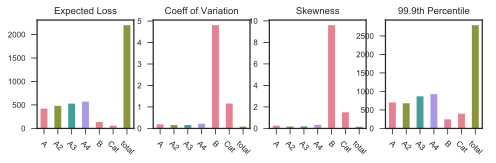

In [111]:
ans.plot('quick')

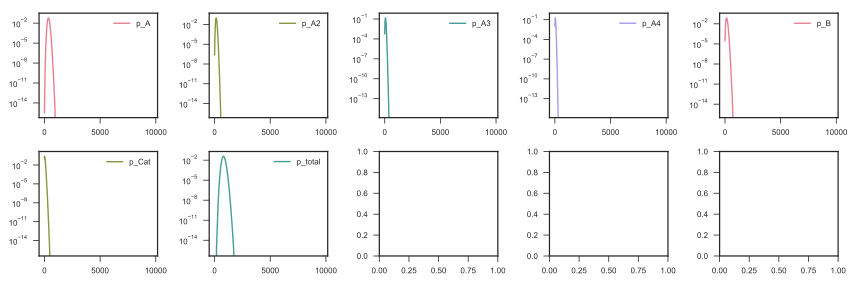

In [78]:
ans.plot('density', aspect=1.2, logy=True, subplots=True)
plt.tight_layout()

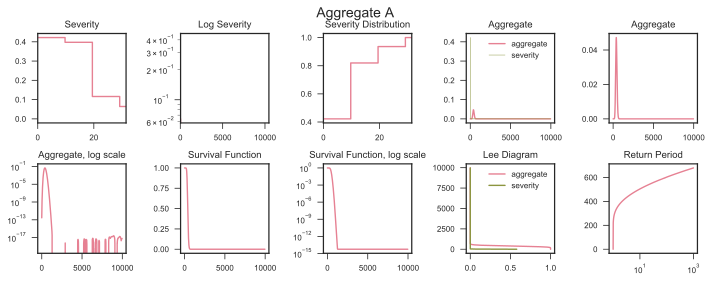

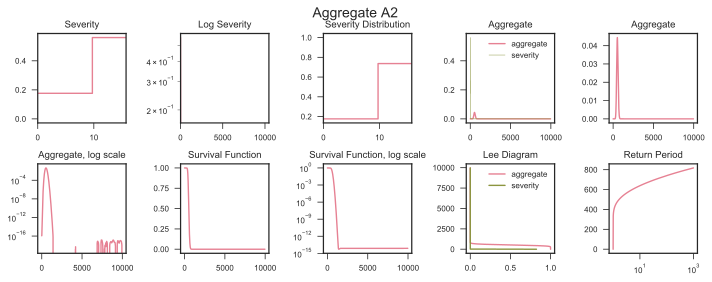

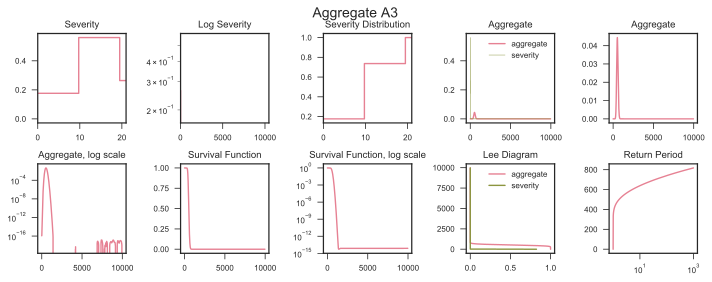

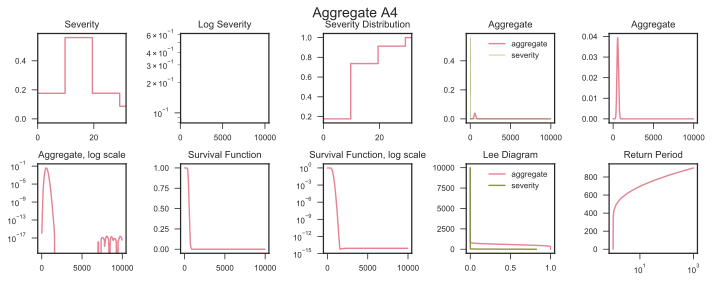

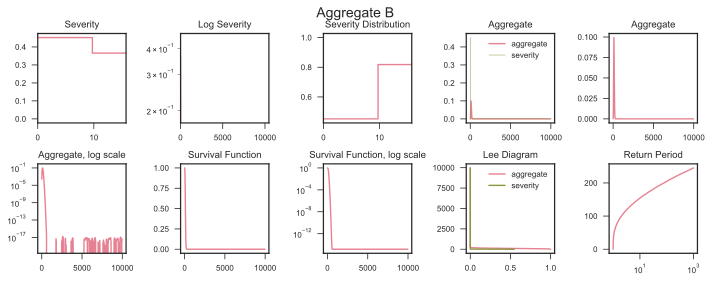

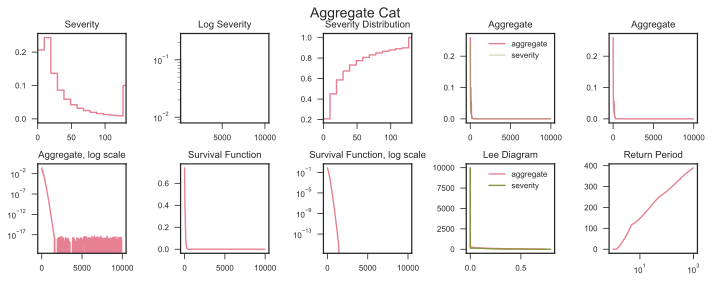

In [115]:
for a in ans:
    a.plot()

In [70]:
ans.report('all')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,100.604,99.4254,-0.0117194,0.239837,0.198326,-0.17308,149.575
B,137.407,140.116,0.0197085,0.854969,0.303062,-0.645529,249.292
Cat,28.2652,28.6338,0.0130395,0.876978,0.878898,0.00218902,101.933
total,266.277,268.175,0.00712655,0.195714,0.198206,0.0127294,402.191


,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,100.604,0.239837,0.367141,30,188.623,1,99.4254,0.198326,0.278576,99.4254,10274.2,1.10097e+06,125.2,132.956,149.575,157.331,168.41,183.922,212.729,-0.0117194,-0.17308,-0.241228
B,137.407,0.854969,1.60481,15,803.555,1,140.116,0.303062,0.332941,140.116,21435.5,3.53425e+06,196.11,213.837,249.292,265.911,290.286,325.741,388.895,0.0197085,-0.645529,-0.792535
Cat,28.2652,0.876978,0.943368,25,142.377,1,28.6338,0.878898,0.946303,28.6338,1453.23,92963.7,62.046,76.4495,101.933,116.336,135.172,165.087,218.269,0.0130395,0.00218902,0.00311151
total,266.277,0.195714,0.282706,30,449.417,1,268.175,0.198206,0.284409,268.175,74743,2.16023e+07,337.929,360.088,402.191,423.242,453.157,496.368,572.817,0.00712655,0.0127294,0.00602447


,A,B,Cat,not A,not B,not Cat,total,A,B,Cat,not A,not B,not Cat,A,B,Cat
,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2
0.001,147.716,253.578,124.963,300.26,217.464,353.28,398.441,391.374,400.029,409.136,401.827,396.556,396.794,420.064,412.79,444.676
0.002,141.711,240.823,115.898,285.317,206.485,339.173,382.273,375.311,383.914,392.951,385.669,380.352,380.671,405.082,397.442,430.616
0.003,138.037,233.023,110.045,276.179,199.813,330.499,372.343,365.444,374.01,383.001,375.743,370.394,370.763,395.952,388.069,422.08
0.004,135.325,227.316,105.708,269.495,194.946,324.124,365.054,358.202,366.731,375.688,368.456,363.083,363.485,389.29,381.215,415.877
0.005,133.172,222.781,102.263,264.187,191.101,319.034,359.24,352.427,360.937,369.862,362.643,357.256,357.688,384.008,375.776,410.962
0.006,131.375,219.006,99.9066,259.76,187.898,314.781,354.379,347.604,356.091,364.99,357.781,352.38,352.842,379.612,371.242,406.884
0.007,129.816,215.753,97.8657,255.946,185.144,311.113,350.185,343.44,351.909,360.785,353.59,348.18,348.66,375.834,367.348,403.382
0.008,128.442,212.89,96.0151,252.596,182.728,307.874,346.491,339.775,348.221,357.076,349.895,344.473,344.974,372.516,363.92,400.315
0.009,127.218,210.331,94.3197,249.602,180.57,304.972,343.177,336.486,344.916,353.75,346.58,341.152,341.668,369.554,360.854,397.574


In [208]:
c1 = uw.liaba

In [214]:
type(c1)
c1.sev_mean = 100

In [216]:
cc = c1.write()

In [217]:
type(cc)

aggregate.distr.Severity

In [218]:
cc.stats()

(array(100.00000000145003), array(10000.00000013929))

In [207]:
cc.statistics_df

,name,limit,attachment,sevcv_param,el,prem,lr,freq_1,freq_2,freq_3,freq_m,freq_cv,freq_skew,sev_1,sev_2,sev_3,sev_m,sev_cv,sev_skew,agg_1,agg_2,agg_3,agg_m,agg_cv,agg_skew,contagion,mix_cv,wt
0,noncata,inf,0,1,1e+06,0,0,10000,1.0101e+08,1.0305e+12,10000,0.100499,-1971.6,100,20000,8e+06,100,1,4,1e+06,1.0102e+12,1.03081e+18,1e+06,0.100995,0.200049,0.1,0.1,1


In [206]:
cc.stats

AttributeError: 'Aggregate' object has no attribute 'stats'

In [44]:
uw.list().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Curves,cata,catb,catc,catd,cate,directors_a,directors_b,directors_c,fixed,liaba,liabb,liabc,,,,,,,,
Blocks,auto,cal,casxol,cata,catb,catc,catd,cate,cmp,comm_auto,comm_prop,homeowners,inland_marine,my_earthquake,my_wind,noncata,pers_auto,ppal,scs,work_comp
Books,Mixed,Single,Sublines,Three Line Example,bodoff1,bodoff2,bodoff3,bodoff4,interesting_cat,mass_test,small_medium_large,,,,,,,,,


In [45]:
b = uw.bodoff1

In [46]:
b.write(True)

/s/telos/python/aggregate_project\aggregate\port.py:1066: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python/aggregate_project\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_ημ_' + col])) / \
C:\Users\steve\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:635: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


{ "name": "bodoff1", 'spec': [{'name': 'wind', 'freq_name': 'fixed', 'freq_a': 0, 'freq_b': 0, 'note': ''}, {'name': 'quake', 'freq_name': 'fixed', 'freq_a': 0, 'freq_b': 0, 'note': ''}], "bs": 1, "log2": 8, "padding": 1, "tilt_amount": 0, "last_distortion": "None", "last_sev_calc": "discrete", "remove_fuzz": True, "approx_type": "slognorm", "approx_freq_ge": 100}

# Integrated Parser

In [1]:
## R E S T A R T   F R O M   H E R E =========================
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")
# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')
import aggregate as agg
import aggregate.underwriter as trash

In [6]:
reload(trash)
uw = trash.Underwriter()

In [7]:
a = uw('mypa: 0.0085 * uw.pers_auto; myca: uw.comm_auto * 0.02 ; mywc: 0.005 * uw.work_comp')
a

In [9]:
type(a)

NoneType

In [5]:
uw.pers_auto

('aggregat',
 {'exp_en': 5676073.301971859,
  'freq_a': 0.089,
  'note': 'US statutory personal auto liability and physical damage, SNL 2017',
  'sev_cv': 0.5,
  'sev_mean': 30000.0,
  'sev_name': 'lognorm'})

In [77]:
pf = uw.write(' 0.0085 * pers_auto; comm_auto * 0.02 ; 0.005 * work_comp', 'test', 'portfolio',
              True, False, log2=14, bs=40e4, remove_fuzz=True)
pf.report('quick')

C:\Users\steve\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
/s/telos/python/aggregate_project\aggregate\port.py:1066: RuntimeWarning: invalid value encountered in maximum
  np.maximum(0, (self.density_df.loc[:, 'e_' + col] - self.density_df.loc[:, 'exa_' + col])) / \
/s/telos/python/aggregate_project\aggregate\port.py:1070: RuntimeWarning: invalid value encountered in maximum
  self.density_df.loc[:, 'exa_ημ_' + col])) / \


,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
0.005 work_comp,1.99826e+08,1.99826e+08,-2.24265e-14,0.190049,0.190049,-4.29545e-13,2.988e+08
0.0085 pers_auto,1.4474e+09,1.4474e+09,-2.76446e-14,0.0890012,0.0890012,4.44311e-13,1.764e+09
comm_auto⊕0.02,6.81129e+07,6.81129e+07,-2.44249e-15,0.0890618,0.0890618,2.95319e-14,8.32e+07
total,1.71534e+09,1.71534e+09,-2.9976e-14,0.000654853,0.0783744,118.682,2.0444e+09


In [ ]:
uw.describe('blocks')

In [13]:
reload(trash)
uw = trash.Underwriter()

In [ ]:
uw.list().T

In [7]:
uw['liaba']

('severit',
 {'note': 'prems ops A, lognormal cv=1.0',
  'sev_cv': 1.0,
  'sev_mean': 50,
  'sev_name': 'lognorm'})

In [61]:
l = np.array(['asd'])

In [62]:
l.append('bc')

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [6]:
# My_pers_auto pers_autao
#  0.0085 * pers_auto; comm_auto * 0.02 ; 0.005 * work_comp'
# Liaba: 50  claims 50 x 50 UW liaba (mixed gamma 0.014)
# ans = uw.script("""
# A: 50  claims   gamma 12 cv .30 (mixed gamma 0.014)
# A_2: 50  claims 30 xs 10  gamma 12 cv .30 (mixed gamma 0.014)
# A4: 50  claims 30 x 20  gamma 12 cv .30 (mixed gamma 0.14); B 15 claims 15 x 15 lognorm 12 cv 1.5 + 2 mixed gamma 4.8
# Cat 1.7 claims 25 x 5 25 * pareto 1.3 0 - 25 
# CatB 1.7 claims 25 * pareto 2.3 0 - 25 
# CatC 1.7 claims inf xs 0 25 * pareto 2.3 0 - 25
# for errors: try just line A=interp error
# through cat2 inf limit = xxx

# Liaba:50   claims    50 x 50   uw.liaba                 (mixed gamma 0.014)
program = """
A:    50  claims,              gamma 12 cv .30          mixed gamma 0.014
Ba:  500 loss,         lognorm 50 cv .8
Bb:  500 loss,  1000 x 0       lognorm 50 cv .8
Bg:  500 loss,         gamma 50 cv .8
C:   500  loss,      75 xs 25, lognorm 50 cv .9
D:    25  claims,    30 x 20,  gamma 12 cv 1.30         (mixed gamma 0.85)
Cat1:  1.7 claims,  125 x 5,   25 * pareto 1.3 - 25 
Cat2:  3.5 claims, 1000 xs 0,  25 * pareto 2.3 0 - 25
"""
programb = """
Thick:  500 loss,         lognorm 50 cv .8
Thin:  500 loss,  1000 x 0       lognorm 50 cv .8
Cat:  2 claims,  1250 x 5,   25 * pareto 1.3 - 25 
"""

programa = '''
MyWC: 0.005 * uw.work_comp
InHomCA: uw.comm_auto * 0.002 ;
HomCA: 0.001 * uw.comm_auto
Cat: 50000000 loss 1e9 x 0 50000000 * pareto 1.3 - 50000000
'''

ans, spec = uw.write(programa, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)
# %timeit ans = uw.write(program, 'script example', False) #, False, log2=13, bs=0.5, remove_fuzz=True, trim_df=False)

AssertionError: 

In [47]:
# for a in ans:
#     a.sevs[0].plot()

In [32]:
ans.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
Thick,1.305940,0.652970,0.326485,0.163243,0.081621,0.040811,0.020405,0.005101,0.001275
Thin,1.305366,0.652683,0.326341,0.163171,0.081585,0.040793,0.020396,0.005099,0.001275
Cat,2.008105,1.004052,0.502026,0.251013,0.125507,0.062753,0.031377,0.007844,0.001961
total,4.619411,2.309706,1.154853,0.577426,0.288713,0.144357,0.072178,0.018045,0.004511


In [33]:
# inter error with just line A
ans.update(13, 1, remove_fuzz=True, trim_df=False, verbose=False)
# ans.update(13, .5e6, remove_fuzz=True, trim_df=False, verbose=False)

In [34]:
ans.report('quick')

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
Cat,135.136,135.132,-2.67107e-05,1.78082,1.78087,2.81529e-05,1291
Thick,500,500,4.50953e-11,0.404969,0.404973,1.01622e-05,1066
Thin,500,500,6.19031e-11,0.404932,0.404936,1.01645e-05,1066
total,1135.14,1135.13,-3.17983e-06,0.329512,0.329515,9.73264e-06,2382


In [41]:
ans.q(.999)

2996.0

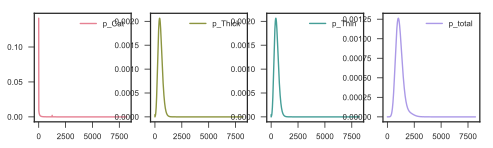

In [35]:
ans.plot('density', subplots=True)

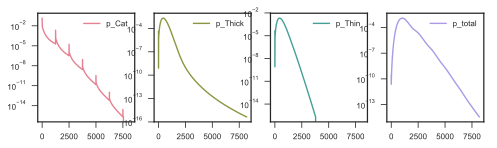

In [36]:
ans.plot('density', subplots=True, logy=True)

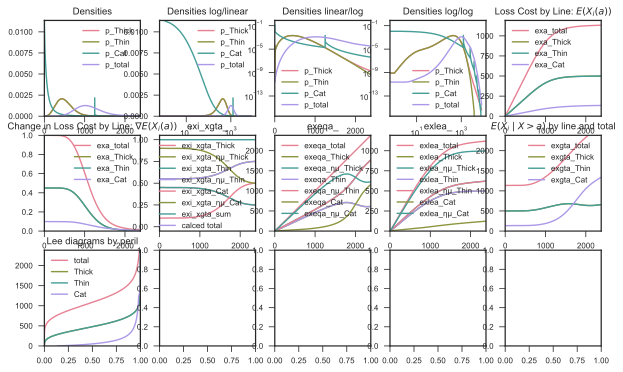

In [37]:
ans.plot('audit')

In [21]:
for a in ans:
    print(a)

Aggregate: MyWC
	EN=2664340.5292379954, CV(N)=0.190
	1 severity, EX=75.0, CV(X)=7.000
	EA=199,825,539.7, CV=0.190
Aggregate: InHomCA
	EN=11352.146603943718, CV(N)=0.089
	1 severity, EX=30,000.0, CV(X)=0.500
	EA=340,564,398.1, CV=0.090
Aggregate: HomCA
	EN=5676073.301971859, CV(N)=0.089
	1 severity, EX=30.0, CV(X)=0.500
	EA=170,282,199.1, CV=0.089
Aggregate: Cat
	EN=0.5009813586730948, CV(N)=1.413
	1 severity, EX=99,804,112.7, CV(X)=1.823
	EA=50,000,000.0, CV=2.937


In [30]:
reload(trash)

<module 'aggregate.underwriter' from '/s/telos/python/aggregate_project\\aggregate\\underwriter.py'>

In [3]:
import aggregate as agg

In [4]:
import aggregate.underwriter as trash
uw = trash.Underwriter()

In [5]:
line = uw['comm_auto']

In [6]:
line

('block',
 {'exp_en': 5676073.301971859,
  'freq_a': 0.089,
  'note': 'US statutory commercial auto liability and physical damage, SNL 2017',
  'sev_cv': 0.5,
  'sev_mean': 30000.0,
  'sev_name': 'lognorm'})

In [7]:
uw.get('liaba')

{'note': 'prems ops A, lognormal cv=1.0',
 'sev_cv': 1.0,
 'sev_mean': 50,
 'sev_name': 'lognorm'}

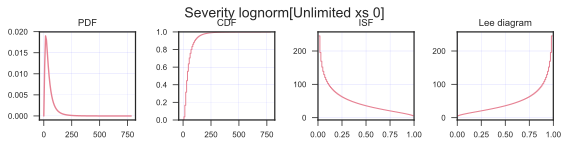

In [8]:
agg.Severity(**uw.get('liaba')).plot()

In [9]:
a = agg.Aggregate('comm auto', **uw.get('comm_auto'))

In [15]:
uw['comm_auto']

('block',
 {'exp_en': 5676073.301971859,
  'freq_a': 0.089,
  'note': 'US statutory commercial auto liability and physical damage, SNL 2017',
  'sev_cv': 0.5,
  'sev_mean': 30000.0,
  'sev_name': 'lognorm'})

# RESET POINT 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='white')
sns.set_palette("husl", 4, .75)
sns.set_style("ticks")
# this file is in examples
import sys
sys.path.insert(0,'/s/telos/python/aggregate_project/')

In [2]:
import aggregate as agg

In [3]:
import aggregate.underwriter as trash

In [4]:
from importlib import reload 

In [5]:
reload(trash)

<module 'aggregate.underwriter' from '/s/telos/python/aggregate_project\\aggregate\\underwriter.py'>

In [4]:
uw = trash.Underwriter(debug=False)

In [5]:
uw.test_write('A: uw.cmp')

,A
exp_el,0
exp_en,268154
exp_premium,0
exp_lr,0
exp_limit,inf
exp_attachment,0
sev_name,lognorm
sev_a,0
sev_b,0
sev_mean,100000


In [6]:
uw.test_write('''B: 10 claims 10 xs 5 \
on lognorm 12 2 fixed ''')

,B
exp_el,0
exp_en,10
exp_premium,0
exp_lr,0
exp_limit,10
exp_attachment,5
sev_name,lognorm
sev_a,12
sev_b,2
sev_mean,0


In [7]:
uw.test_write('''A1: 500 premium at 0.5  on  gamma 12 cv .30 (mixed gamma 0.014)
    A1: 500 premium at 0.5 lr on gamma 12 cv .30 (mixed gamma 0.014)
    A2: 50  claims 30 xs 10  on gamma 12 cv .30 (mixed gamma 0.014)
    A3: 50  claims   on gamma 12 cv .30 (mixed gamma 0.014)
    A4: 50  claims 30 xs 20 on gamma 12 cv .30 (mixed gamma 0.14)
    hcmp: 1000 * uw.cmp
    incmp: uw.cmp * 0.001''')

,A1,A1,A2,A3,A4,hcmp,incmp
exp_el,250,250,0,0,0,0,0
exp_en,0,0,50,50,50,268154,268.154
exp_premium,500,500,0,0,0,0,0
exp_lr,0.5,0.5,0,0,0,0,0
exp_limit,inf,inf,30,inf,30,inf,inf
exp_attachment,0,0,10,0,20,0,0
sev_name,gamma,gamma,gamma,gamma,gamma,lognorm,lognorm
sev_a,0,0,0,0,0,0,0
sev_b,0,0,0,0,0,0,0
sev_mean,12,12,12,12,12,1e+08,100000


In [13]:
uw = trash.Underwriter(debug=False)

In [8]:
uw.test_write('''
big_mixture 50 claims [50, 100, 150, 200] xs 0 on lognorm 12 cv [1,2,3,4] poisson
A1: 500 premium at 0.5  on  gamma 12 cv .30 (mixed gamma 0.014)
A1: 500 premium at 0.5 lr on gamma 12 cv .30 (mixed gamma 0.014)
A2: 50  claims 30 xs 10  on gamma 12 cv .30 (mixed gamma 0.014)
A3: 50  claims   on gamma 12 cv .30 (mixed gamma 0.014)
A4: 50  claims 30 xs 20 on gamma 12 cv .30 (mixed gamma 0.14)
hcmp: 1000 * uw.cmp
incmp uw.cmp * 0.001
''')

,big_mixture,A1,A1,A2,A3,A4,hcmp,incmp
exp_el,0,250,250,0,0,0,0,0
exp_en,50,0,0,50,50,50,268154,268.154
exp_premium,0,500,500,0,0,0,0,0
exp_lr,0,0.5,0.5,0,0,0,0,0
exp_limit,"[50.0, 100.0, 150.0, 200.0]",inf,inf,30,inf,30,inf,inf
exp_attachment,0,0,0,10,0,20,0,0
sev_name,lognorm,gamma,gamma,gamma,gamma,gamma,lognorm,lognorm
sev_a,0,0,0,0,0,0,0,0
sev_b,0,0,0,0,0,0,0,0
sev_mean,12,12,12,12,12,12,1e+08,100000


In [13]:
portfolio_program = """
| name        | expos                 | limit                    | sev                                               | freq              |
|:------------|:----------------------|:-------------------------|:--------------------------------------------------|:------------------|
| big_mixture | 50 claims             | [50, 100, 150, 200] xs 0 | on lognorm 12 cv [1,2,3,4] wts [0.25 .25 .25 .25] | poisson           |
| A1          | 500 premium at 0.5    |                          | on gamma 12 cv .30                                | mixed gamma 0.014 |
| A1          | 500 premium at 0.5 lr |                          | on gamma 12 cv .30                                | mixed gamma 0.014 |
| A2          | 50  claims            | 30 xs 10                 | on gamma 12 cv .30                                | mixed gamma 0.014 |
| A3          | 50  claims            |                          | on gamma 12 cv .30                                | mixed gamma 0.014 |
| A4          | 50  claims            | 30 xs 20                 | on gamma 12 cv .30                                | mixed gamma 0.14  |
| hcmp        | 1000 * uw.cmp         |                          |                                                   |                   |
| incmp       | uw.cmp * 0.001        |                          |                                                   |                   |

"""

In [14]:
uw.test_write(portfolio_program)

,big_mixture,A1,A1,A2,A3,A4,hcmp,incmp
exp_el,0,250,250,0,0,0,0,0
exp_en,50,0,0,50,50,50,268154,268.154
exp_premium,0,500,500,0,0,0,0,0
exp_lr,0,0.5,0.5,0,0,0,0,0
exp_limit,"[50.0, 100.0, 150.0, 200.0]",inf,inf,30,inf,30,inf,inf
exp_attachment,0,0,0,10,0,20,0,0
sev_name,lognorm,gamma,gamma,gamma,gamma,gamma,lognorm,lognorm
sev_a,0,0,0,0,0,0,0,0
sev_b,0,0,0,0,0,0,0,0
sev_mean,12,12,12,12,12,12,1e+08,100000


In [8]:
import aggregate.underwriter as trash 
uw = trash.Underwriter(debug=False)

In [9]:
port = uw.write('''
A: 10 claims 10 xs 5 on lognorm 10 cv 1.5
B: 10 claims 50 xs 5 on lognorm 10 cv 1.5
C: 10 claims         on lognorm 10 cv 1.5
''', 'prog1')

In [10]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
A,0.136669,0.068335,0.034167,0.017084,0.008542,0.004271,0.002135,0.000534,0.000133
B,0.305492,0.152746,0.076373,0.038187,0.019093,0.009547,0.004773,0.001193,0.000298
C,0.433681,0.216840,0.108420,0.054210,0.027105,0.013553,0.006776,0.001694,0.000424
total,0.875843,0.437921,0.218961,0.109480,0.054740,0.027370,0.013685,0.003421,0.000855


In [11]:
port.update(13, .1)

In [12]:
port.report()  # subset of the audit report 

,Mean,EmpMean,MeanErr,CV,EmpCV,CVErr,P99.0
A,58.4656,58.4652,-7.55696e-06,0.37431,0.374316,1.59536e-05,115.6
B,103.185,103.185,-5.4362e-06,0.484523,0.484527,7.16057e-06,243.2
C,100,99.9584,-0.000415936,0.570088,0.567122,-0.00520262,287.1
total,261.651,261.51,-0.000540188,0.301626,0.300135,-0.0049453,486.8


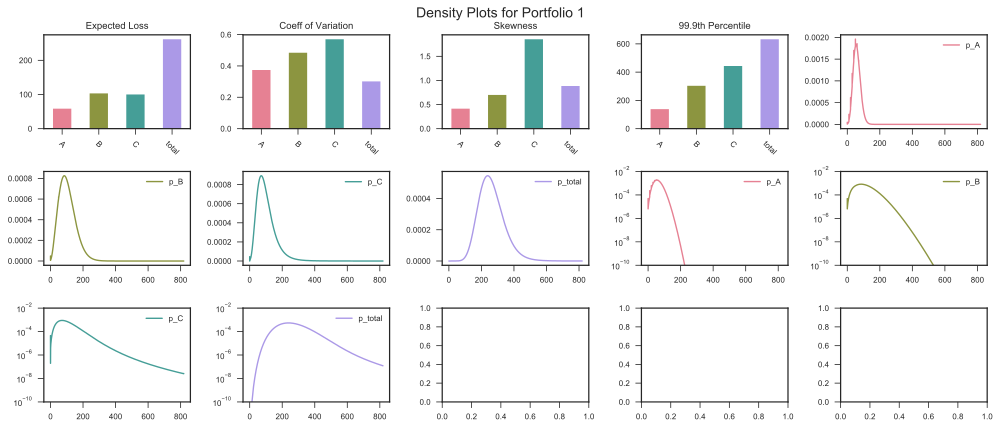

In [13]:
a = agg.axiter_factory(None, 12, aspect=1.4, height=2)
port.plot('quick', axiter=a)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2)
port.plot('density', axiter=a, subplots=True, aspect=1.4, height=2, logy=True, ylim=[1e-10, 1e-2])
agg.suptitle_and_tight('Density Plots for Portfolio 1')

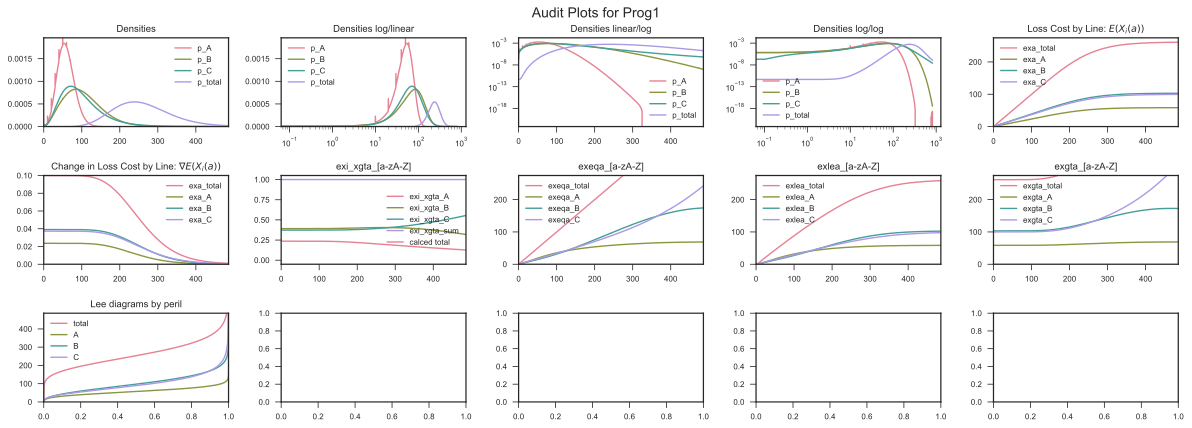

In [14]:
port.plot('audit', aspect=1.666, height=2)

In [15]:
agg.qd(port.audit_df)

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,58,0.374,0.414,1.000e+01,140,1.000e+00,58,0.374,0.414,58,"3,897","288,187",87,97,116,125,138,158,192,-7.557e-06,0.000,-0.000
B,103,0.485,0.699,5.000e+01,313,1.000e+00,103,0.485,0.699,103,"13,147","1,959,710",170,194,243,268,303,357,453,-5.436e-06,0.000,-0.000
C,100,0.570,1.853,inf,444,1.000e+00,100,0.567,1.664,100,"13,205","2,265,513",171,204,287,342,443,688,0,-4.159e-04,-0.005,-0.102
total,262,0.302,0.885,inf,617,9.999e-01,262,0.300,0.761,262,"74,548","23,084,801",363,401,487,539,632,0,0,-5.402e-04,-0.005,-0.140


In [34]:
port.audit_df

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,58.465641,0.374310,0.414124,10.000000,139.949392,1,58.4652,0.374316,0.414123,58.4652,3897.11,288187,87.4,96.9,115.6,125,138,157.6,191.8,-7.55696e-06,1.59536e-05,-2.13882e-06
B,103.185273,0.484523,0.698894,50.000000,312.824202,1,103.185,0.484527,0.698892,103.185,13146.7,1.95971e+06,170.5,194.5,243.2,268.2,303.4,357.1,453.4,-5.4362e-06,7.16057e-06,-2.20296e-06
C,100.000000,0.570088,1.852785,inf,444.089294,0.999959,99.9584,0.567122,1.6637,99.9584,13205.3,2.26551e+06,171.1,204.2,287.1,342,443.1,688.1,0,-0.000415936,-0.00520262,-0.102056
total,261.650914,0.301626,0.884863,inf,617.216677,0.999855,261.51,0.300135,0.760852,261.51,74547.6,2.30848e+07,363.4,401.3,486.8,538.9,632.3,0,0,-0.000540188,-0.0049453,-0.140146


In [44]:
port.audit_df.style.format(agg.get_fmts(port.audit_df))

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,58,3.743e-01,4.141e-01,1.000e+01,140,1.000e+00,58,3.743e-01,4.141e-01,58,"3,897","288,187",87,97,116,125,138,158,192,-7.557e-06,1.595e-05,-2.139e-06
B,103,4.845e-01,6.989e-01,5.000e+01,313,1.000e+00,103,4.845e-01,6.989e-01,103,"13,147","1,959,710",170,194,243,268,303,357,453,-5.436e-06,7.161e-06,-2.203e-06
C,100,5.701e-01,1.853e+00,inf,444,1.000e+00,100,5.671e-01,1.664e+00,100,"13,205","2,265,513",171,204,287,342,443,688,0,-4.159e-04,-5.203e-03,-1.021e-01
total,262,3.016e-01,8.849e-01,inf,617,9.999e-01,262,3.001e-01,7.609e-01,262,"74,548","23,084,801",363,401,487,539,632,0,0,-5.402e-04,-4.945e-03,-1.401e-01


In [45]:
f = lambda x : x.style.format(agg.get_fmts(x))

In [46]:
f(port.audit_df)

,Mean,CV,Skew,Limit,P99.9Est,Sum p,EmpMean,EmpCV,EmpSkew,EmpEX1,EmpEX2,EmpEX3,P90.0,P95.0,P99.0,P99.6,P99.9,P99.99,P99.9999,MeanErr,CVErr,SkewErr
A,58,3.743e-01,4.141e-01,1.000e+01,140,1.000e+00,58,3.743e-01,4.141e-01,58,"3,897","288,187",87,97,116,125,138,158,192,-7.557e-06,1.595e-05,-2.139e-06
B,103,4.845e-01,6.989e-01,5.000e+01,313,1.000e+00,103,4.845e-01,6.989e-01,103,"13,147","1,959,710",170,194,243,268,303,357,453,-5.436e-06,7.161e-06,-2.203e-06
C,100,5.701e-01,1.853e+00,inf,444,1.000e+00,100,5.671e-01,1.664e+00,100,"13,205","2,265,513",171,204,287,342,443,688,0,-4.159e-04,-5.203e-03,-1.021e-01
total,262,3.016e-01,8.849e-01,inf,617,9.999e-01,262,3.001e-01,7.609e-01,262,"74,548","23,084,801",363,401,487,539,632,0,0,-5.402e-04,-4.945e-03,-1.401e-01
